In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data =load_iris()

In [3]:
X = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


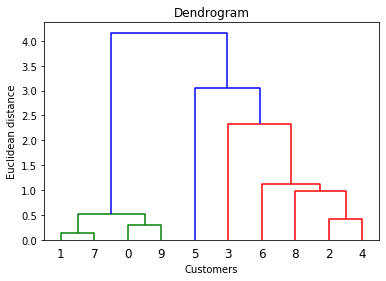

In [10]:
dendrogram = sch.dendrogram(sch.linkage(X.sample(n=10),
                                        method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

In [11]:
from sklearn.manifold import MDS

In [21]:
mds = MDS(n_components=2)

In [22]:
Xm = pd.DataFrame(mds.fit_transform(X),columns=['d1','d2'])

In [23]:
Xm['type'] = data.target

In [28]:
Xm['type'].replace(dict(zip(range(3),list(data.target_names))),inplace=True)

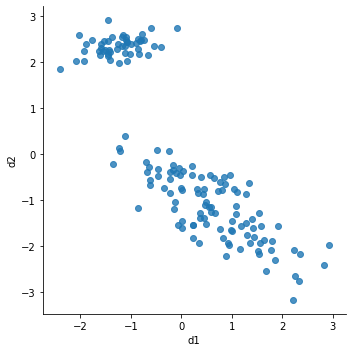

In [32]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False)

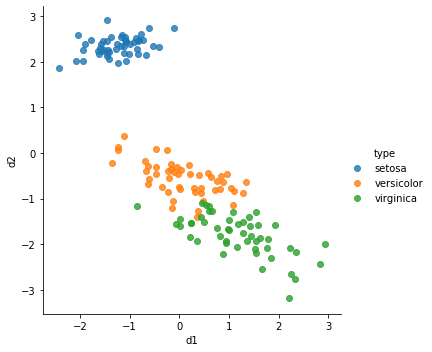

In [33]:
sns.lmplot(data=Xm,x='d1',y='d2',fit_reg=False,hue='type')

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [37]:
sc = StandardScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [40]:
pca = PCA(n_components=2)

In [41]:
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [42]:
pca.explained_variance_ratio_.cumsum()

array([0.72962445, 0.95813207])

In [43]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])

In [46]:
Xp ['type'] = Xm['type']

In [47]:
Xp.head()

,p1,p2,type
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


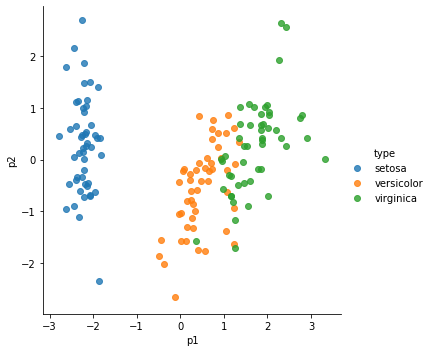

In [49]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='type')

In [50]:
from sklearn.manifold import TSNE

In [51]:
tsne = TSNE(n_components=2,n_jobs=-1)

In [52]:
Xt = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2'])

In [55]:
Xt['type'] = Xp['type']

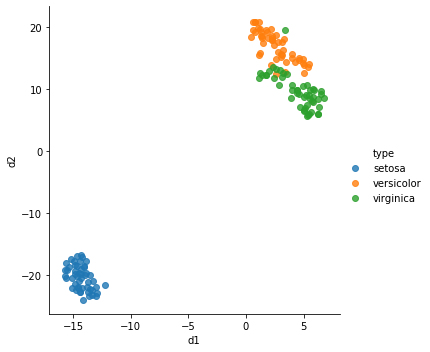

In [57]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='type')

In [68]:
from sklearn.cluster import AgglomerativeClustering

In [80]:
cl = AgglomerativeClustering(n_clusters=2,linkage='average')

In [81]:
Xt['cl'] = cl.fit_predict(X)

In [82]:
from sklearn.metrics import confusion_matrix

In [83]:
confusion_matrix(y_pred=Xt['cl'],y_true= data.target)

array([[ 0, 50,  0],
       [50,  0,  0],
       [50,  0,  0]])

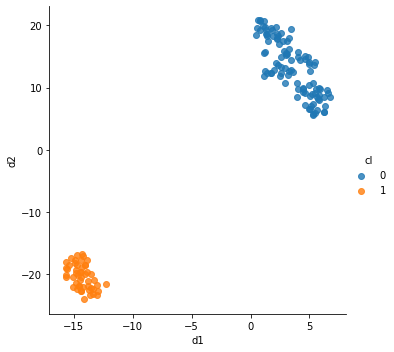

In [84]:
sns.lmplot(data=Xt,x='d1',y='d2',fit_reg=False,hue='cl')